In [1]:
#!/usr/bin/env python3

import os
import sys
import numpy as np 
import argparse 
import time 

import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 


from torchvision import datasets, transforms

seed = 7
np.random.seed(seed)
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size =200

n_epochs = 5


def param(nnet, Mb=True):
    """
    Return the number of parameters in nnet
    """
    nelems = sum([param.nelement() for param in nnet.parameters()])

    return nelems / 10**6 if Mb else nelems

In [2]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
from torch.nn import functional as F

import numpy as np
import torch.optim as optim
import torch.utils.data
from torchvision import datasets, transforms
from collections import defaultdict


Num_H = 1600

class dnn_autoencoder(nn.Module):
    def __init__(self,Num_H):
        super(dnn_autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, Num_H),
            nn.ReLU(True),
            nn.Linear(Num_H, Num_H),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(Num_H, 28*28), nn.ReLU(True))
        self.name = "DNN_autoencoder"

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
def test_ae(model, criterion, optimizer, test_loader):
    # monitor training loss
    test_loss = 0.0
    for data in test_loader:
        # _ stands in for labels, here
        images, _ = data
        # flatten images
        images = images.view(images.size(0), -1)
        images = images.to(device)
        outputs = model(images)
        loss = criterion(outputs, images)
        test_loss += loss.item()*images.size(0)

    test_loss = test_loss/len(test_loader)
    print('Val. Loss: {:.6f}'.format( 
        test_loss
        ))
    return test_loss

def train_ae(model, n_epochs, criterion, optimizer, train_loader, test_loader, w_name = "19_dnn_ae"):
    for epoch in range(1, n_epochs+1):
        # monitor training loss
        train_loss = 0.0
        test_loss = 0.0
        ###################
        # train the model #
        ###################
        for data in train_loader:
            # _ stands in for labels, here
            images, _ = data
            # flatten images
            images = images.view(images.size(0), -1)
            images = images.to(device)
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            outputs = model(images)
            # calculate the loss
            loss = criterion(outputs, images)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*images.size(0)

        # print avg training statistics 
        train_loss = train_loss/len(train_loader)
        test_loss = test_ae(model, criterion, optimizer, test_loader)
        print('Epoch: {} \t Training Loss: {:.6f} \t Val. Loss: {:.6f}'.format(
            epoch, 
            train_loss, test_loss
            ))

    torch.save(model.state_dict(), "model_weights/" + w_name + ".pt")
    return model, test_loss



In [4]:



### get data
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)
# Create training and test dataloaders

seed = 7
np.random.seed(seed)
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


lr = 0.0001
# specify loss function

# number of epochs to train the model
n_epochs = 10



In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_res(model):
    # obtain one batch of test images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    images_flatten = images.view(images.size(0), -1)
    # get sample outputs
    output = model(images_flatten.to(device))
    # prep images for display
    images = images.numpy()

    # output is resized into a batch of images
    output = output.view(batch_size, 1, 28, 28)
    # use detach when it's an output that requires_grad
    output = output.cpu().detach().numpy()

    # plot the first ten input images and then reconstructed images
    fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

    # input images on top row, reconstructions on bottom
    for images, row in zip([images, output], axes):
        for img, ax in zip(images, row):
            ax.imshow(np.squeeze(img), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

In [13]:
# model_ae = autoencoder(800).cuda()
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(
# model_ae.parameters(), lr=1e-4, weight_decay=1e-5)

# model_ae = train_ae(model_ae, 10, criterion, optimizer, train_loader)
# loss = train_ae(model_ae, criterion, optimizer, test_loader)

# print("DNN MSE Results, N = 800")
# print("DNN MSE", param(model_ae),"MB", ", Val. loss = ", loss)
# show_res(model_ae)

# DNN AE Results

Val. Loss: 0.947990
Epoch: 1 	 Training Loss: 1.129190 	 Val. Loss: 0.947990
Val. Loss: 0.863042
Epoch: 2 	 Training Loss: 0.884232 	 Val. Loss: 0.863042
Val. Loss: 0.816838
Epoch: 3 	 Training Loss: 0.822396 	 Val. Loss: 0.816838
Val. Loss: 0.779737
Epoch: 4 	 Training Loss: 0.781993 	 Val. Loss: 0.779737
Val. Loss: 0.750708
Epoch: 5 	 Training Loss: 0.751836 	 Val. Loss: 0.750708
Val. Loss: 0.727829
Epoch: 6 	 Training Loss: 0.728374 	 Val. Loss: 0.727829
Val. Loss: 0.712006
Epoch: 7 	 Training Loss: 0.709494 	 Val. Loss: 0.712006
Val. Loss: 0.695485
Epoch: 8 	 Training Loss: 0.694704 	 Val. Loss: 0.695485
Val. Loss: 0.694835
Epoch: 9 	 Training Loss: 0.683656 	 Val. Loss: 0.694835
Val. Loss: 0.683193
Epoch: 10 	 Training Loss: 0.675756 	 Val. Loss: 0.683193
DNN MAE Results, N =  800
DNN MAE 1.896784 MB , Val. loss =  0.6831931135803461


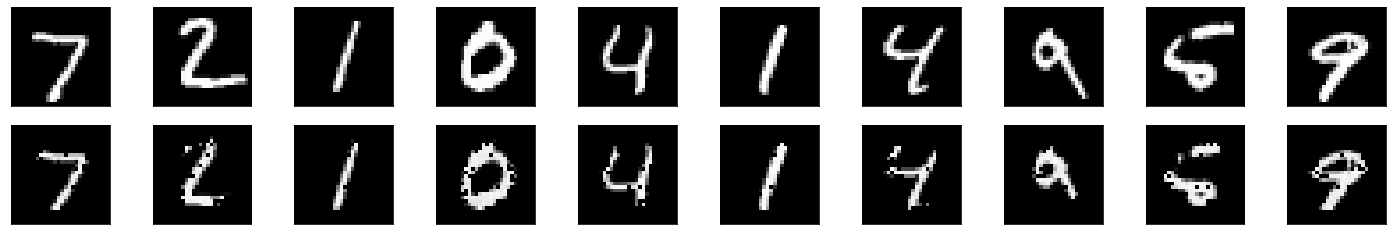

In [17]:
Num_H = 800

model_ae = dnn_autoencoder(Num_H).cuda()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(
model_ae.parameters(), lr=1e-4)

model_ae, val_loss = train_ae(model_ae, 10, criterion, optimizer, train_loader, test_loader, w_name = "dnn_ae"+str(Num_H) )

print("DNN MAE Results, N = ", Num_H )
print("DNN MAE", param(model_ae),"MB", ", Val. loss = ", val_loss)
show_res(model_ae)

Val. Loss: 1.038338
Epoch: 1 	 Training Loss: 1.212143 	 Val. Loss: 1.038338
Val. Loss: 0.955438
Epoch: 2 	 Training Loss: 0.972214 	 Val. Loss: 0.955438
Val. Loss: 0.900803
Epoch: 3 	 Training Loss: 0.910117 	 Val. Loss: 0.900803
Val. Loss: 0.862736
Epoch: 4 	 Training Loss: 0.866880 	 Val. Loss: 0.862736
Val. Loss: 0.836162
Epoch: 5 	 Training Loss: 0.837820 	 Val. Loss: 0.836162
Val. Loss: 0.810531
Epoch: 6 	 Training Loss: 0.814867 	 Val. Loss: 0.810531
Val. Loss: 0.794602
Epoch: 7 	 Training Loss: 0.797169 	 Val. Loss: 0.794602
Val. Loss: 0.783614
Epoch: 8 	 Training Loss: 0.783504 	 Val. Loss: 0.783614
Val. Loss: 0.777716
Epoch: 9 	 Training Loss: 0.773905 	 Val. Loss: 0.777716
Val. Loss: 0.770190
Epoch: 10 	 Training Loss: 0.767739 	 Val. Loss: 0.770190
DNN MAE Results, N = 800
DNN MAE 1.896784 MB , Val. loss =  0.7701896288245916


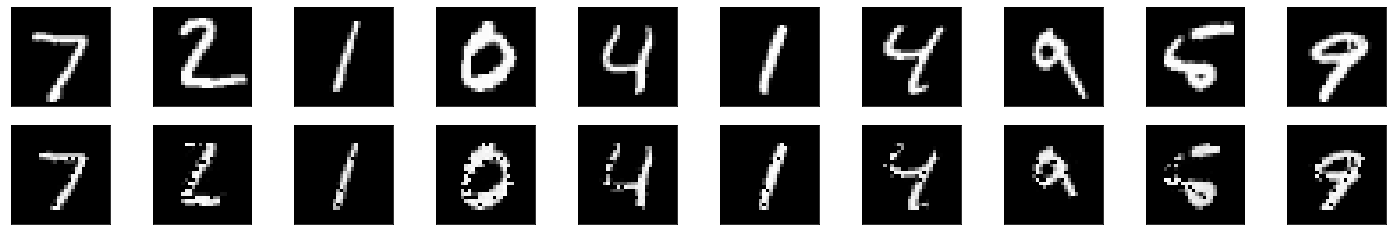

Val. Loss: 1.004933
Epoch: 1 	 Training Loss: 1.171989 	 Val. Loss: 1.004933
Val. Loss: 0.914813
Epoch: 2 	 Training Loss: 0.942089 	 Val. Loss: 0.914813
Val. Loss: 0.866872
Epoch: 3 	 Training Loss: 0.875933 	 Val. Loss: 0.866872
Val. Loss: 0.832215
Epoch: 4 	 Training Loss: 0.836634 	 Val. Loss: 0.832215
Val. Loss: 0.803986
Epoch: 5 	 Training Loss: 0.808273 	 Val. Loss: 0.803986
Val. Loss: 0.782006
Epoch: 6 	 Training Loss: 0.786908 	 Val. Loss: 0.782006
Val. Loss: 0.773482
Epoch: 7 	 Training Loss: 0.771047 	 Val. Loss: 0.773482
Val. Loss: 0.767649
Epoch: 8 	 Training Loss: 0.760494 	 Val. Loss: 0.767649
Val. Loss: 0.758016
Epoch: 9 	 Training Loss: 0.754439 	 Val. Loss: 0.758016
Val. Loss: 0.757470
Epoch: 10 	 Training Loss: 0.750740 	 Val. Loss: 0.757470
DNN MAE Results, N = 900
DNN MAE 2.223784 MB , Val. loss =  0.7574699306488037


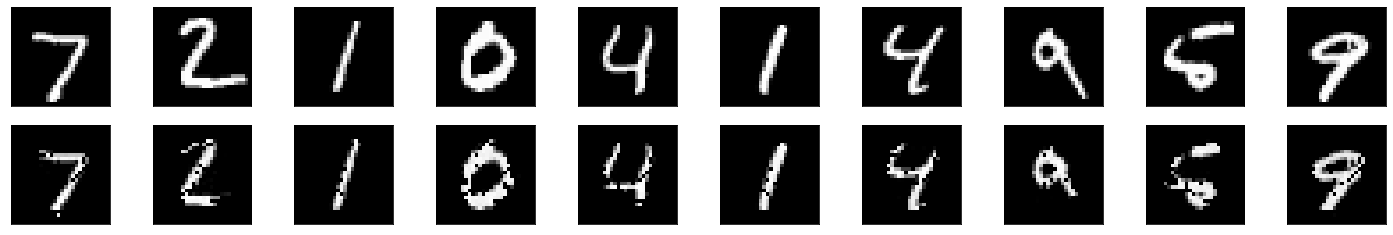

Val. Loss: 0.965579
Epoch: 1 	 Training Loss: 1.126538 	 Val. Loss: 0.965579
Val. Loss: 0.877306
Epoch: 2 	 Training Loss: 0.894943 	 Val. Loss: 0.877306
Val. Loss: 0.825700
Epoch: 3 	 Training Loss: 0.833161 	 Val. Loss: 0.825700
Val. Loss: 0.787620
Epoch: 4 	 Training Loss: 0.793233 	 Val. Loss: 0.787620
Val. Loss: 0.762068
Epoch: 5 	 Training Loss: 0.764285 	 Val. Loss: 0.762068
Val. Loss: 0.743773
Epoch: 6 	 Training Loss: 0.743085 	 Val. Loss: 0.743773
Val. Loss: 0.732946
Epoch: 7 	 Training Loss: 0.728501 	 Val. Loss: 0.732946
Val. Loss: 0.728251
Epoch: 8 	 Training Loss: 0.719557 	 Val. Loss: 0.728251
Val. Loss: 0.721940
Epoch: 9 	 Training Loss: 0.714347 	 Val. Loss: 0.721940
Val. Loss: 0.721110
Epoch: 10 	 Training Loss: 0.711333 	 Val. Loss: 0.721110
DNN MAE Results, N = 1000
DNN MAE 2.570784 MB , Val. loss =  0.7211100751161575


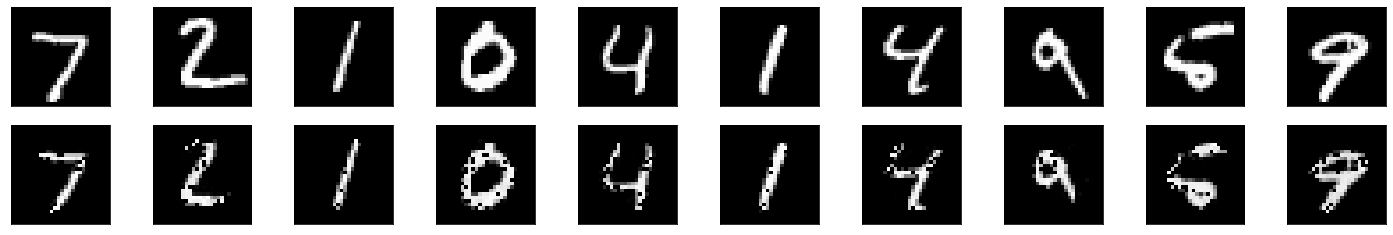

Val. Loss: 0.951965
Epoch: 1 	 Training Loss: 1.113658 	 Val. Loss: 0.951965
Val. Loss: 0.855650
Epoch: 2 	 Training Loss: 0.877909 	 Val. Loss: 0.855650
Val. Loss: 0.801668
Epoch: 3 	 Training Loss: 0.811177 	 Val. Loss: 0.801668
Val. Loss: 0.764258
Epoch: 4 	 Training Loss: 0.771567 	 Val. Loss: 0.764258
Val. Loss: 0.740831
Epoch: 5 	 Training Loss: 0.743908 	 Val. Loss: 0.740831
Val. Loss: 0.724967
Epoch: 6 	 Training Loss: 0.725065 	 Val. Loss: 0.724967
Val. Loss: 0.720978
Epoch: 7 	 Training Loss: 0.712588 	 Val. Loss: 0.720978
Val. Loss: 0.716459
Epoch: 8 	 Training Loss: 0.705578 	 Val. Loss: 0.716459
Val. Loss: 0.707181
Epoch: 9 	 Training Loss: 0.701909 	 Val. Loss: 0.707181
Val. Loss: 0.706667
Epoch: 10 	 Training Loss: 0.699752 	 Val. Loss: 0.706667
DNN MAE Results, N = 1100
DNN MAE 2.937784 MB , Val. loss =  0.7066670483350754


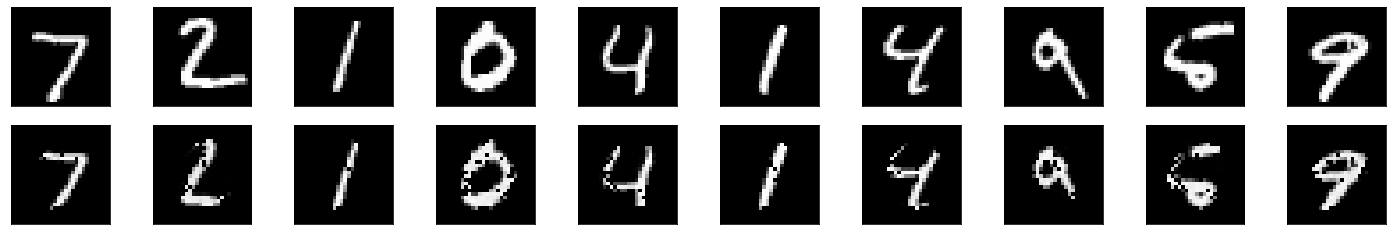

Val. Loss: 0.943781
Epoch: 1 	 Training Loss: 1.085627 	 Val. Loss: 0.943781
Val. Loss: 0.852498
Epoch: 2 	 Training Loss: 0.872640 	 Val. Loss: 0.852498
Val. Loss: 0.808050
Epoch: 3 	 Training Loss: 0.815573 	 Val. Loss: 0.808050
Val. Loss: 0.788467
Epoch: 4 	 Training Loss: 0.784317 	 Val. Loss: 0.788467
Val. Loss: 0.774750
Epoch: 5 	 Training Loss: 0.768039 	 Val. Loss: 0.774750
Val. Loss: 0.767948
Epoch: 6 	 Training Loss: 0.760670 	 Val. Loss: 0.767948
Val. Loss: 0.765007
Epoch: 7 	 Training Loss: 0.757258 	 Val. Loss: 0.765007
Val. Loss: 0.766946
Epoch: 8 	 Training Loss: 0.755661 	 Val. Loss: 0.766946
Val. Loss: 0.769619
Epoch: 9 	 Training Loss: 0.754683 	 Val. Loss: 0.769619
Val. Loss: 0.764741
Epoch: 10 	 Training Loss: 0.753830 	 Val. Loss: 0.764741
DNN MAE Results, N = 1600
DNN MAE 5.072784 MB , Val. loss =  0.7647413042187691


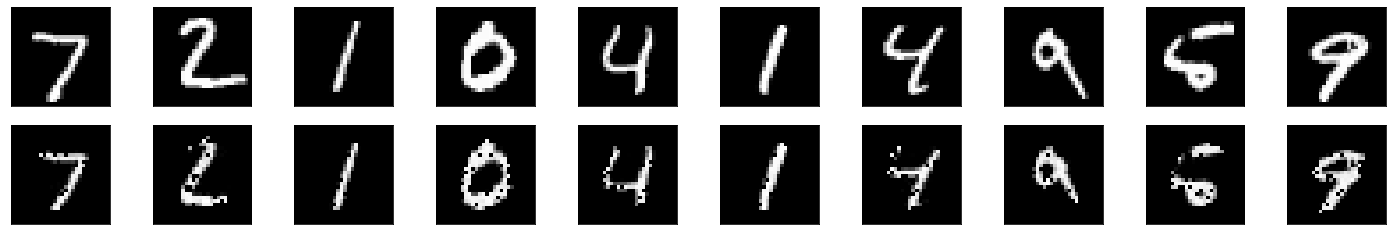

Val. Loss: 0.930508
Epoch: 1 	 Training Loss: 1.059898 	 Val. Loss: 0.930508
Val. Loss: 0.854319
Epoch: 2 	 Training Loss: 0.867040 	 Val. Loss: 0.854319
Val. Loss: 0.827935
Epoch: 3 	 Training Loss: 0.820806 	 Val. Loss: 0.827935
Val. Loss: 0.808813
Epoch: 4 	 Training Loss: 0.803171 	 Val. Loss: 0.808813
Val. Loss: 0.807619
Epoch: 5 	 Training Loss: 0.794617 	 Val. Loss: 0.807619
Val. Loss: 0.805428
Epoch: 6 	 Training Loss: 0.791752 	 Val. Loss: 0.805428
Val. Loss: 0.808492
Epoch: 7 	 Training Loss: 0.790021 	 Val. Loss: 0.808492
Val. Loss: 0.807949
Epoch: 8 	 Training Loss: 0.789297 	 Val. Loss: 0.807949
Val. Loss: 0.803638
Epoch: 9 	 Training Loss: 0.788440 	 Val. Loss: 0.803638
Val. Loss: 0.806462
Epoch: 10 	 Training Loss: 0.787552 	 Val. Loss: 0.806462
DNN MAE Results, N = 2400
DNN MAE 9.528784 MB , Val. loss =  0.8064622403681279


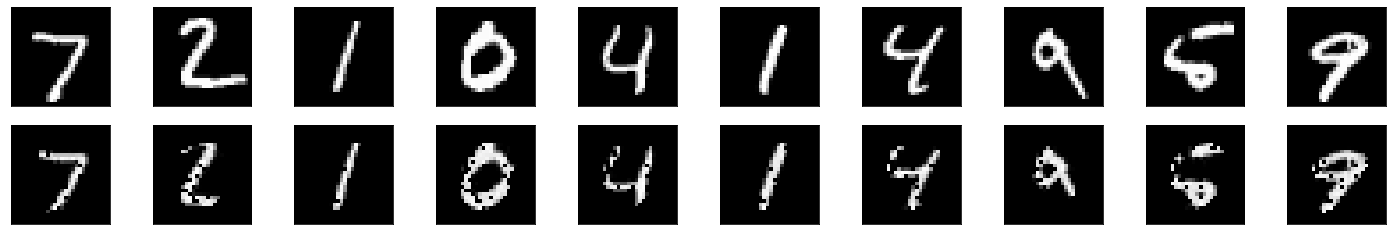

In [16]:
for Num_H in [800, 900, 1000, 1100, 1600, 2400]:

    model_ae = dnn_autoencoder(Num_H).cuda()
    criterion = nn.L1Loss()
    optimizer = torch.optim.Adam(
    model_ae.parameters(), lr=1e-4)

    model_ae , val_loss = train_ae(model_ae, 10, criterion, optimizer, train_loader, test_loader, w_name = "dnn_ae"+str(Num_H) )


    print("DNN MAE Results, N =", Num_H)
    print("DNN MAE", param(model_ae),"MB", ", Val. loss = ", val_loss)
    show_res(model_ae)

In [6]:
val_loss_book = []
para_book = []

Val. Loss: 1.319790
Epoch: 1 	 Training Loss: 1.634216 	 Val. Loss: 1.319790
Val. Loss: 1.175854
Epoch: 2 	 Training Loss: 1.235366 	 Val. Loss: 1.175854
Val. Loss: 1.102708
Epoch: 3 	 Training Loss: 1.133035 	 Val. Loss: 1.102708
Val. Loss: 1.064955
Epoch: 4 	 Training Loss: 1.080122 	 Val. Loss: 1.064955
Val. Loss: 1.039203
Epoch: 5 	 Training Loss: 1.047987 	 Val. Loss: 1.039203
Val. Loss: 1.019397
Epoch: 6 	 Training Loss: 1.024986 	 Val. Loss: 1.019397
Val. Loss: 1.003333
Epoch: 7 	 Training Loss: 1.007117 	 Val. Loss: 1.003333
Val. Loss: 0.989980
Epoch: 8 	 Training Loss: 0.992529 	 Val. Loss: 0.989980
Val. Loss: 0.979349
Epoch: 9 	 Training Loss: 0.980243 	 Val. Loss: 0.979349
Val. Loss: 0.969322
Epoch: 10 	 Training Loss: 0.969914 	 Val. Loss: 0.969322
DNN MAE Results, N = 100
--- DNN MAE 0.167784 MB , Val. loss =  0.9693221512436867


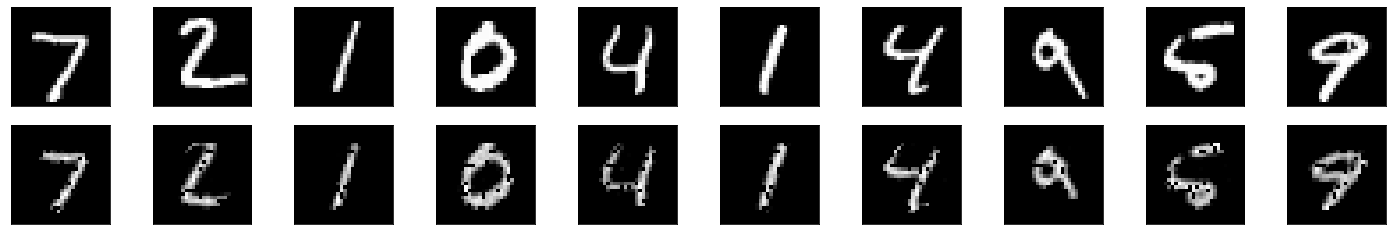

Val. Loss: 1.150870
Epoch: 1 	 Training Loss: 1.442915 	 Val. Loss: 1.150870
Val. Loss: 1.033285
Epoch: 2 	 Training Loss: 1.073374 	 Val. Loss: 1.033285
Val. Loss: 0.978494
Epoch: 3 	 Training Loss: 0.992401 	 Val. Loss: 0.978494
Val. Loss: 0.944329
Epoch: 4 	 Training Loss: 0.948471 	 Val. Loss: 0.944329
Val. Loss: 0.918124
Epoch: 5 	 Training Loss: 0.917478 	 Val. Loss: 0.918124
Val. Loss: 0.896640
Epoch: 6 	 Training Loss: 0.894757 	 Val. Loss: 0.896640
Val. Loss: 0.877693
Epoch: 7 	 Training Loss: 0.874361 	 Val. Loss: 0.877693
Val. Loss: 0.866007
Epoch: 8 	 Training Loss: 0.859726 	 Val. Loss: 0.866007
Val. Loss: 0.853177
Epoch: 9 	 Training Loss: 0.847583 	 Val. Loss: 0.853177
Val. Loss: 0.843462
Epoch: 10 	 Training Loss: 0.836867 	 Val. Loss: 0.843462
DNN MAE Results, N = 200
--- DNN MAE 0.354784 MB , Val. loss =  0.8434621787071228


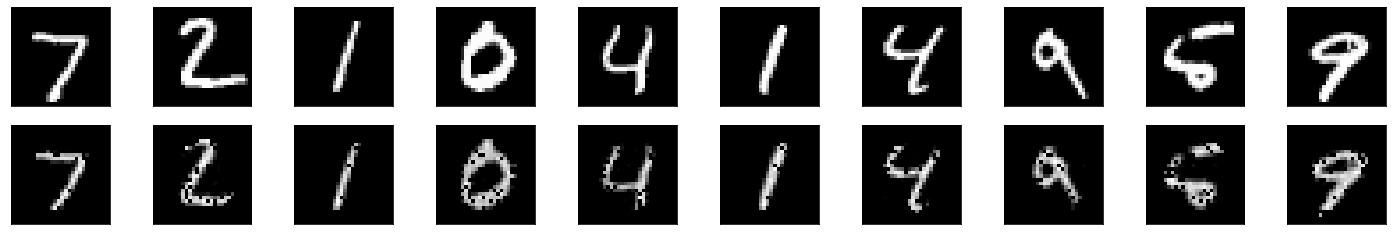

Val. Loss: 1.074650
Epoch: 1 	 Training Loss: 1.332914 	 Val. Loss: 1.074650
Val. Loss: 0.967487
Epoch: 2 	 Training Loss: 1.002665 	 Val. Loss: 0.967487
Val. Loss: 0.916979
Epoch: 3 	 Training Loss: 0.931862 	 Val. Loss: 0.916979
Val. Loss: 0.885594
Epoch: 4 	 Training Loss: 0.891393 	 Val. Loss: 0.885594
Val. Loss: 0.861079
Epoch: 5 	 Training Loss: 0.863144 	 Val. Loss: 0.861079
Val. Loss: 0.843834
Epoch: 6 	 Training Loss: 0.841097 	 Val. Loss: 0.843834
Val. Loss: 0.825297
Epoch: 7 	 Training Loss: 0.823303 	 Val. Loss: 0.825297
Val. Loss: 0.812587
Epoch: 8 	 Training Loss: 0.808240 	 Val. Loss: 0.812587
Val. Loss: 0.799608
Epoch: 9 	 Training Loss: 0.795211 	 Val. Loss: 0.799608
Val. Loss: 0.787764
Epoch: 10 	 Training Loss: 0.783741 	 Val. Loss: 0.787764
DNN MAE Results, N = 300
--- DNN MAE 0.561784 MB , Val. loss =  0.7877643255889416


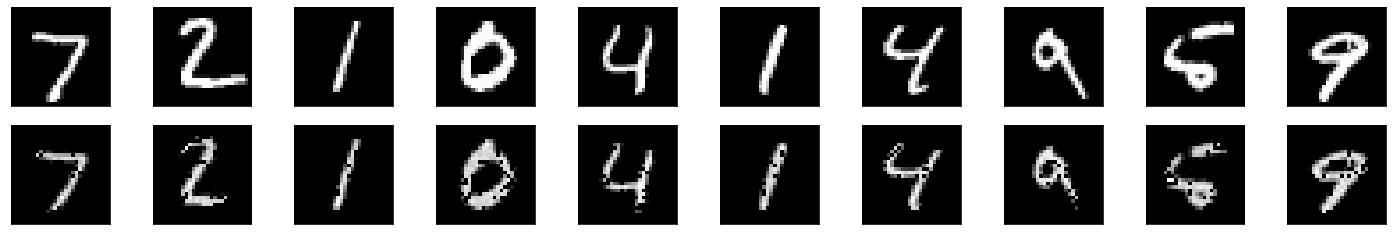

Val. Loss: 1.036373
Epoch: 1 	 Training Loss: 1.278835 	 Val. Loss: 1.036373
Val. Loss: 0.943318
Epoch: 2 	 Training Loss: 0.969471 	 Val. Loss: 0.943318
Val. Loss: 0.897387
Epoch: 3 	 Training Loss: 0.905202 	 Val. Loss: 0.897387
Val. Loss: 0.861893
Epoch: 4 	 Training Loss: 0.866161 	 Val. Loss: 0.861893
Val. Loss: 0.831391
Epoch: 5 	 Training Loss: 0.837189 	 Val. Loss: 0.831391
Val. Loss: 0.814109
Epoch: 6 	 Training Loss: 0.813864 	 Val. Loss: 0.814109
Val. Loss: 0.794795
Epoch: 7 	 Training Loss: 0.794470 	 Val. Loss: 0.794795
Val. Loss: 0.779439
Epoch: 8 	 Training Loss: 0.778063 	 Val. Loss: 0.779439
Val. Loss: 0.765463
Epoch: 9 	 Training Loss: 0.763709 	 Val. Loss: 0.765463
Val. Loss: 0.753012
Epoch: 10 	 Training Loss: 0.751221 	 Val. Loss: 0.753012
DNN MAE Results, N = 400
--- DNN MAE 0.788784 MB , Val. loss =  0.7530121324956417


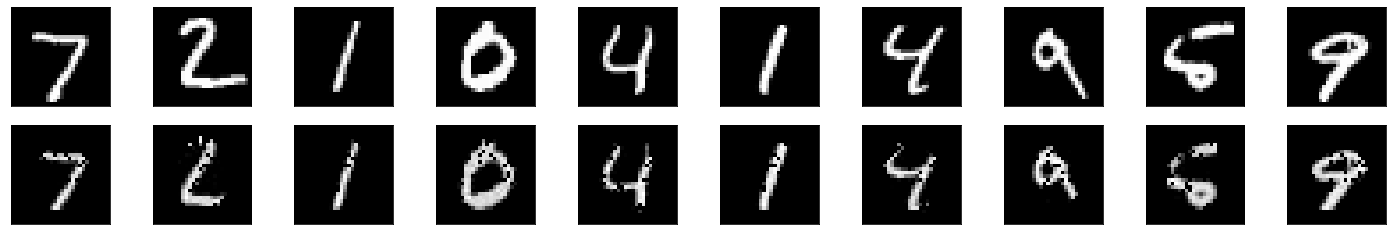

Val. Loss: 0.988393
Epoch: 1 	 Training Loss: 1.206570 	 Val. Loss: 0.988393
Val. Loss: 0.904013
Epoch: 2 	 Training Loss: 0.924750 	 Val. Loss: 0.904013
Val. Loss: 0.854875
Epoch: 3 	 Training Loss: 0.861345 	 Val. Loss: 0.854875
Val. Loss: 0.819046
Epoch: 4 	 Training Loss: 0.821537 	 Val. Loss: 0.819046
Val. Loss: 0.792286
Epoch: 5 	 Training Loss: 0.791967 	 Val. Loss: 0.792286
Val. Loss: 0.766126
Epoch: 6 	 Training Loss: 0.768344 	 Val. Loss: 0.766126
Val. Loss: 0.748693
Epoch: 7 	 Training Loss: 0.748937 	 Val. Loss: 0.748693
Val. Loss: 0.732730
Epoch: 8 	 Training Loss: 0.732267 	 Val. Loss: 0.732730
Val. Loss: 0.716387
Epoch: 9 	 Training Loss: 0.717612 	 Val. Loss: 0.716387
Val. Loss: 0.705020
Epoch: 10 	 Training Loss: 0.704595 	 Val. Loss: 0.705020
DNN MAE Results, N = 500
--- DNN MAE 1.035784 MB , Val. loss =  0.7050201473385096


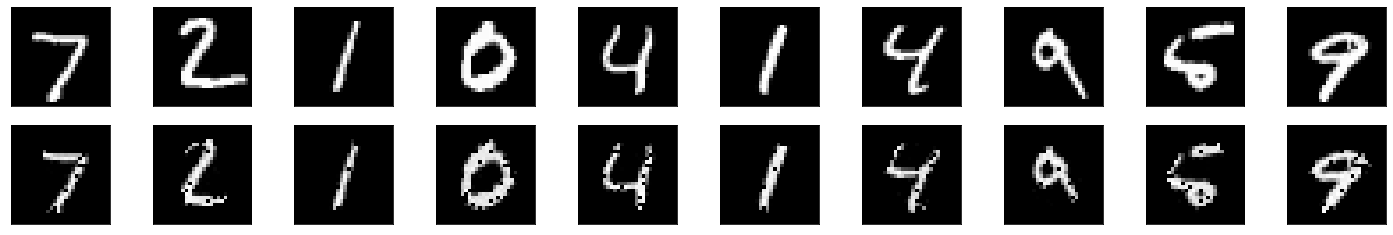

Val. Loss: 1.015524
Epoch: 1 	 Training Loss: 1.215634 	 Val. Loss: 1.015524
Val. Loss: 0.921361
Epoch: 2 	 Training Loss: 0.940805 	 Val. Loss: 0.921361
Val. Loss: 0.875587
Epoch: 3 	 Training Loss: 0.878320 	 Val. Loss: 0.875587
Val. Loss: 0.838462
Epoch: 4 	 Training Loss: 0.836315 	 Val. Loss: 0.838462
Val. Loss: 0.810909
Epoch: 5 	 Training Loss: 0.806504 	 Val. Loss: 0.810909
Val. Loss: 0.786841
Epoch: 6 	 Training Loss: 0.782914 	 Val. Loss: 0.786841
Val. Loss: 0.765647
Epoch: 7 	 Training Loss: 0.763251 	 Val. Loss: 0.765647
Val. Loss: 0.748841
Epoch: 8 	 Training Loss: 0.746434 	 Val. Loss: 0.748841
Val. Loss: 0.735894
Epoch: 9 	 Training Loss: 0.732255 	 Val. Loss: 0.735894
Val. Loss: 0.722664
Epoch: 10 	 Training Loss: 0.720243 	 Val. Loss: 0.722664
DNN MAE Results, N = 600
--- DNN MAE 1.302784 MB , Val. loss =  0.7226639773696661


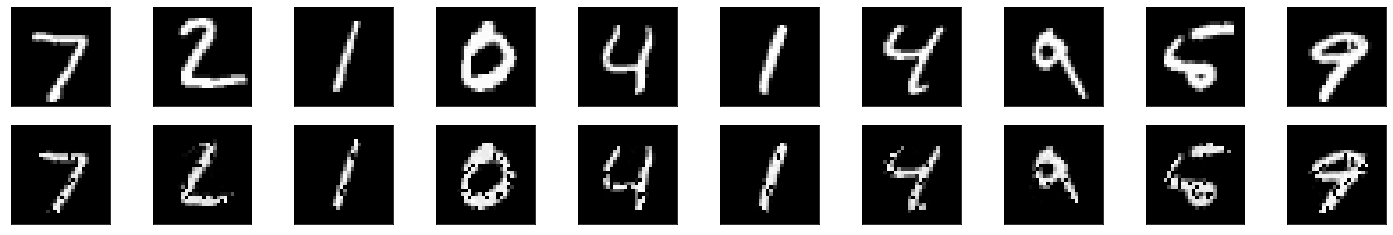

Val. Loss: 0.966906
Epoch: 1 	 Training Loss: 1.161556 	 Val. Loss: 0.966906
Val. Loss: 0.875727
Epoch: 2 	 Training Loss: 0.898112 	 Val. Loss: 0.875727
Val. Loss: 0.825322
Epoch: 3 	 Training Loss: 0.830241 	 Val. Loss: 0.825322
Val. Loss: 0.792836
Epoch: 4 	 Training Loss: 0.788987 	 Val. Loss: 0.792836
Val. Loss: 0.757267
Epoch: 5 	 Training Loss: 0.758269 	 Val. Loss: 0.757267
Val. Loss: 0.735190
Epoch: 6 	 Training Loss: 0.734058 	 Val. Loss: 0.735190
Val. Loss: 0.715973
Epoch: 7 	 Training Loss: 0.714203 	 Val. Loss: 0.715973
Val. Loss: 0.698795
Epoch: 8 	 Training Loss: 0.697908 	 Val. Loss: 0.698795
Val. Loss: 0.685410
Epoch: 9 	 Training Loss: 0.684348 	 Val. Loss: 0.685410
Val. Loss: 0.679510
Epoch: 10 	 Training Loss: 0.673840 	 Val. Loss: 0.679510
DNN MAE Results, N = 700
--- DNN MAE 1.589784 MB , Val. loss =  0.6795097321271897


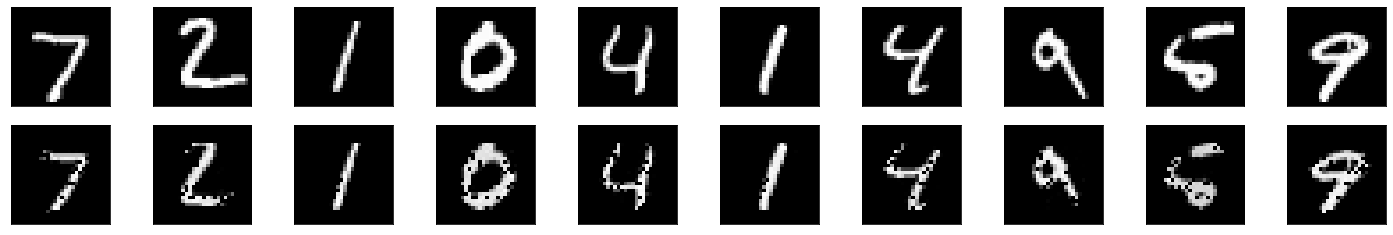

Val. Loss: 1.043324
Epoch: 1 	 Training Loss: 1.211797 	 Val. Loss: 1.043324
Val. Loss: 0.959781
Epoch: 2 	 Training Loss: 0.978350 	 Val. Loss: 0.959781
Val. Loss: 0.914327
Epoch: 3 	 Training Loss: 0.918187 	 Val. Loss: 0.914327
Val. Loss: 0.872769
Epoch: 4 	 Training Loss: 0.879412 	 Val. Loss: 0.872769
Val. Loss: 0.853179
Epoch: 5 	 Training Loss: 0.850241 	 Val. Loss: 0.853179
Val. Loss: 0.830937
Epoch: 6 	 Training Loss: 0.827827 	 Val. Loss: 0.830937
Val. Loss: 0.816091
Epoch: 7 	 Training Loss: 0.810247 	 Val. Loss: 0.816091
Val. Loss: 0.803613
Epoch: 8 	 Training Loss: 0.797094 	 Val. Loss: 0.803613
Val. Loss: 0.797877
Epoch: 9 	 Training Loss: 0.787802 	 Val. Loss: 0.797877
Val. Loss: 0.794619
Epoch: 10 	 Training Loss: 0.781883 	 Val. Loss: 0.794619
DNN MAE Results, N = 800
--- DNN MAE 1.896784 MB , Val. loss =  0.7946190443634987


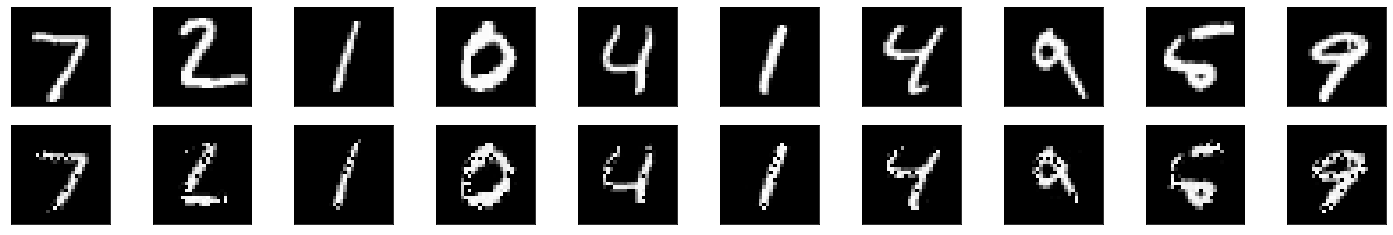

In [7]:
for Num_H in [100, 200, 300, 400, 500, 600,700,800]:

    model_ae = dnn_autoencoder(Num_H).cuda()
    criterion = nn.L1Loss()
    optimizer = torch.optim.Adam(
    model_ae.parameters(), lr=1e-4)

    model_ae , val_loss = train_ae(model_ae, 10, criterion, optimizer, train_loader, test_loader, w_name = "ann_ae"+str(Num_H) )
    val_loss_book.append(val_loss)

    print("DNN MAE Results, N =", Num_H)
    print("--- DNN MAE", param(model_ae),"MB", ", Val. loss = ", val_loss)
    para_book.append(param(model_ae))
    show_res(model_ae)